# VIDUSHI BHARDWAJ

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# THE SPARKS FOUNDATION : GRIPJAN21

# Task 2 : Prediction using Unsupervised ML

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## data is read
data =pd.read_csv(r"C:\Users\Vidushi bhardwaj\Desktop\TSF\TASK2\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum() ## null values in each column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data=data.drop(columns='Id') ## dropping the first column = id

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# DATA VISUALIZATION

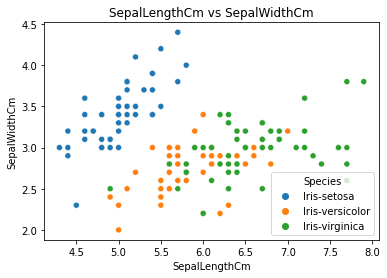

In [11]:
## plotting the graph between SepalLengthCm vs SepalWidthCm
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=12)
plt.show()

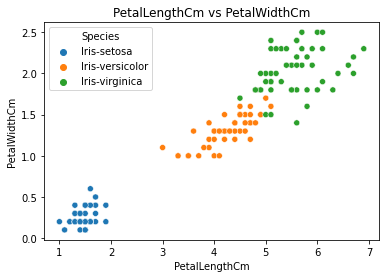

In [12]:
## plotting the graph between PetalLengthCm vs PetalWidthCm
sns.scatterplot(x='PetalLengthCm' , y='PetalWidthCm',hue='Species',data=data)
plt.title('PetalLengthCm vs PetalWidthCm', fontsize=12)
plt.show()

# SPLITTING THE DATA

In [13]:
## splitting the data into 2 parts x and y
## x=data[independent variables]
## y=data[dependent variables]
x=data.iloc[:,[0,1,2,3]].values
y=data['Species']

In [14]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [15]:
## unique values in y
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Applying Kmeans Algorithm

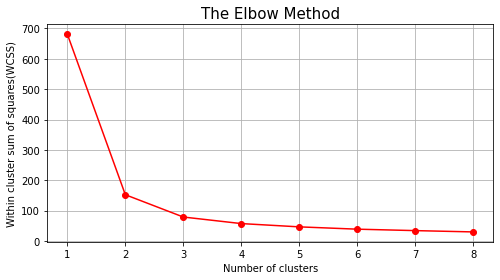

In [16]:
## finding the optimum number of clusters from kmeans classification using the elbow method
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(range(1,9),elbow,'ro-')
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares(WCSS)')
plt.grid()
plt.show()

###### The above graph shows 3 as the optimal number of clusters . After 3 , the line becomes linear in nature.

In [17]:
## creating the kmeans classifier
kmeans=KMeans(n_clusters=3)
y_pred=kmeans.fit_predict(x)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Visualization after applying the Kmeans Algorithm

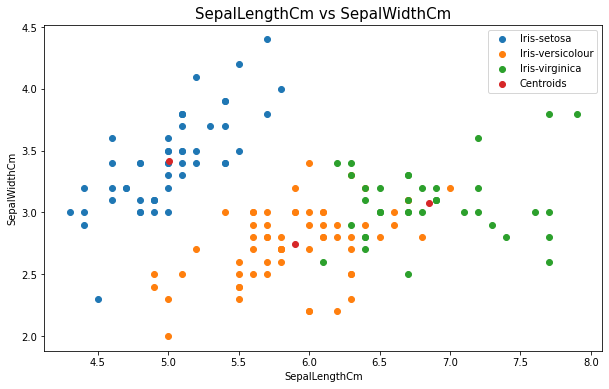

In [19]:
## visualization of SepalLengthCm vs SepalWidthCm
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],label='Iris-setosa')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],label='Iris-versicolour')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label = 'Centroids')
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=15)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

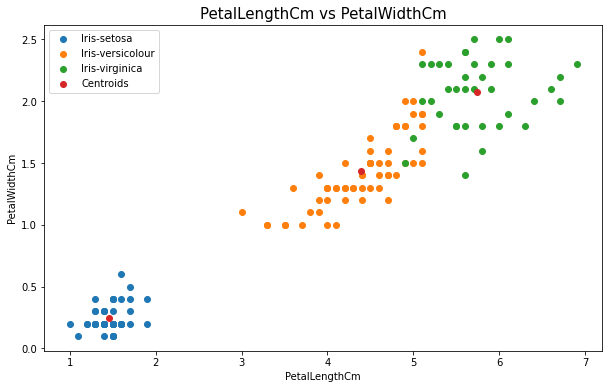

In [20]:
## visualization of PetalLengthCm vs PetalWidthCm
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0,2],x[y_pred == 0,3],label='Iris-setosa')
plt.scatter(x[y_pred == 1,2],x[y_pred == 1,3],label='Iris-versicolour')
plt.scatter(x[y_pred == 2,2],x[y_pred == 2,3],label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],label = 'Centroids')
plt.title('PetalLengthCm vs PetalWidthCm',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()